In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append("..")

In [2]:
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['xtick.labelsize'] = 19
mpl.rcParams['ytick.labelsize'] = 19
mpl.rcParams["axes.labelsize"] = 22
mpl.rcParams['legend.fontsize'] = 22
mpl.rcParams['axes.titlesize'] = 25
mpl.rcParams['text.usetex'] = True

In [3]:
n = 5

np.random.seed(12)
z = np.random.exponential(scale=1.0, size=n)
quantiles = np.sort(z)

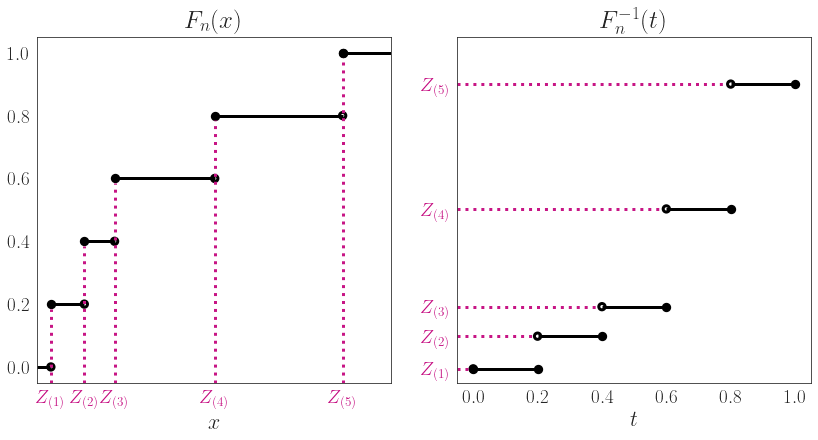

In [4]:
sns.set_style("white")
tol1 = 0.06
tol2 = 0.01
linewdith = 3
s = 40
color = "mediumvioletred"

fig, ax = plt.subplots(1, 2, figsize=(12, 6.75))

p = np.array([(i + 1) / n for i in range(n)])

# Plot CDF.
for i in range(n - 1):
    ax[0].hlines(p[i], xmin=quantiles[i], xmax=quantiles[i + 1], color="k", linewidth=linewdith)
    ax[1].hlines(quantiles[i], xmin=p[i] - 1/n, xmax=p[i + 1] - 1/n, color="k", linewidth=linewdith)

ax[0].scatter(quantiles[n-1], 1.0, color="k", linewidth=3, s=s)
ax[0].scatter(quantiles, p, color="k", linewidth=linewdith, s=s)
ax[0].scatter(quantiles[1:], p[:-1], linewidth=linewdith, s=s, facecolors='None', edgecolors='k')

ax[1].scatter(p[:-1], quantiles[:-1], color="k", linewidth=linewdith, s=s)
ax[1].scatter(p - 1/n, quantiles, linewidth=linewdith, s=s, facecolors='None', edgecolors='k')
ax[1].scatter(0.0, quantiles[0], linewidth=linewdith, s=s, color="k")

ax[0].set_xticks(quantiles)
ax[1].set_yticks(quantiles)
ax[1].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax[0].set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

ax[0].set_xticklabels([r"$Z_{(1)}$", r"$Z_{(2)}$", r"$Z_{(3)}$", r"$Z_{(4)}$", r"$Z_{(5)}$"], color=color)
ax[1].set_yticklabels([r"$Z_{(1)}$", r"$Z_{(2)}$", r"$Z_{(3)}$", r"$Z_{(4)}$", r"$Z_{(5)}$"], color=color)

ax[0].set_title(r"$F_n(x)$", pad=10)
ax[1].set_title(r"$F^{-1}_n(t)$", pad=10)

ax[0].set_xlabel(r"$x$")
ax[1].set_xlabel(r"$t$")

    
low_lim = -0.05
ax[0].set_ylim(low_lim, 1.05)
ax[1].set_ylim(low_lim , quantiles.max() + 0.22)
ax[0].set_xlim(low_lim , quantiles.max() + 0.22)
ax[1].set_xlim(low_lim , 1.05)

ax[0].hlines(0.0, xmin=low_lim , xmax=quantiles[0], color="k", linewidth=linewdith)
ax[0].scatter(quantiles[0], 0.0, linewidth=linewdith, s=s, facecolors='None', edgecolors='k')
ax[0].hlines(1.0, xmin=quantiles[-1], xmax=quantiles.max() + 0.22, color="k", linewidth=linewdith)
ax[1].scatter(1.0, quantiles[-1], linewidth=linewdith, s=s, color='k')
ax[1].hlines(quantiles[-1], xmin=1.0 - 1 / n, xmax=1.0, color="k", linewidth=linewdith)

# Add red dotted lines.
tol = 0.015
for i in range(n):
    ax[0].vlines(quantiles[i], ymin=low_lim, ymax=p[i] - tol, linestyle="dotted", color=color, linewidth=linewdith)
    ax[1].hlines(quantiles[i], xmin=low_lim, xmax=p[i] - 1 / n - tol, linestyle="dotted", color=color, linewidth=linewdith)

fig.tight_layout(pad=3.0)
# fig.subplots_adjust(top=0.2)

plt.savefig("../figures/quantile.pdf")